In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import csv
import plotly.express as px
source_file = 'source_data/housing_data_cleaned.csv'

In [3]:
housing_df = pd.read_csv(source_file, encoding='utf-8', low_memory=False)
housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940,Y,19124.0,RSA5


In [4]:
housing_df['sale_date'] = pd.to_datetime(housing_df['sale_date'], unit='D', origin='1899-12-30')
housing_df['sale_date'].head()

0   2020-09-28
1   2020-09-28
2   2020-09-25
3   2020-09-25
4   2020-09-24
Name: sale_date, dtype: datetime64[ns]

In [5]:
#Removing unecessary columns from the dataframe and save to new dataframe
new_df = housing_df[['sale_date', 'sale_price', 'unit', 'year_built', 'zip_code', 'zoning']]
new_df.head()

,sale_date,sale_price,unit,year_built,zip_code,zoning
0,2020-09-28,90000,NaN,1895,19144.0,RSA5
1,2020-09-28,145000,B307,1970,19152.0,RM2
2,2020-09-25,52500,NaN,1940,19140.0,RM1
3,2020-09-25,154000,NaN,1940,19141.0,RSA3
4,2020-09-24,65900,NaN,1940,19124.0,RSA5


In [6]:
new_df['sale_year'] = pd.DatetimeIndex(new_df['sale_date']).year
new_df.head()

<ipython-input-6-a6e439732123>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sale_year'] = pd.DatetimeIndex(new_df['sale_date']).year


,sale_date,sale_price,unit,year_built,zip_code,zoning,sale_year
0,2020-09-28,90000,NaN,1895,19144.0,RSA5,2020
1,2020-09-28,145000,B307,1970,19152.0,RM2,2020
2,2020-09-25,52500,NaN,1940,19140.0,RM1,2020
3,2020-09-25,154000,NaN,1940,19141.0,RSA3,2020
4,2020-09-24,65900,NaN,1940,19124.0,RSA5,2020


In [7]:
new_df = new_df.groupby(['sale_year']).sum()
new_df

,sale_price,zip_code
sale_year,,
2016,5047819296,396510996.0
2017,6366271510,436553784.0
2018,6913266553,444286610.0
2019,9003771436,437884179.0
2020,2969734150,187966204.0


<IPython.core.display.Javascript object>


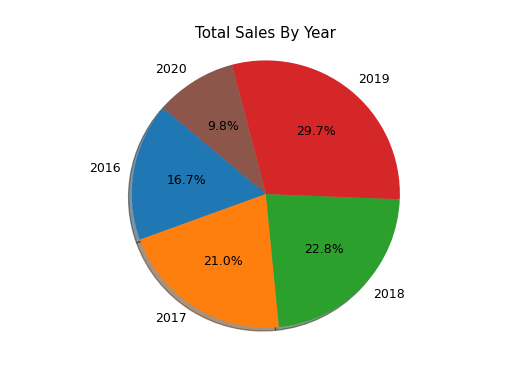

In [8]:
labels = ['2016', '2017', '2018', '2019', '2020']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.0, 0, 0, 0, 0) 
plt.pie(new_df['sale_price'], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Total Sales By Year")
plt.show()


In [28]:
housing_df = pd.read_csv(source_file, encoding='utf-8', low_memory=False)
housing_df.head()

,basements,building_code_description,category_code_description,census_tract,central_air,depth,exempt_building,exempt_land,exterior_condition,fireplaces,...,topography,total_area,total_livable_area,type_heater,unit,view_type,year_built,year_built_estimate,zip_code,zoning
0,D,ROW 3 STY MASONRY,Single Family,241.0,N,67.0,49200,0,4.0,0.0,...,F,938.00,1344.0,A,NaN,I,1895,Y,19144.0,RSA5
1,NaN,RES CONDO 3 STY MAS+OTH,Single Family,337.0,Y,0.0,45000,0,4.0,0.0,...,NaN,0.00,947.0,NaN,B307,I,1970,Y,19152.0,RM2
2,NaN,ROW 2 STY MASONRY,Single Family,201.0,NaN,70.0,0,0,4.0,0.0,...,F,1044.00,1190.0,NaN,NaN,I,1940,Y,19140.0,RM1
3,H,ROW B/GAR 2 STY MASONRY,Single Family,281.0,N,95.5,0,0,4.0,0.0,...,F,1686.53,1633.0,B,NaN,I,1940,Y,19141.0,RSA3
4,NaN,ROW 2 STY MASONRY,Single Family,293.0,NaN,112.5,0,0,4.0,0.0,...,F,2165.62,1320.0,B,NaN,I,1940,Y,19124.0,RSA5


In [29]:
housing_df.head()
housing_df['sale_date'] = pd.to_datetime(housing_df['sale_date'], unit='D', origin='1899-12-30')
housing_df['sale_date'].head()

0   2020-09-28
1   2020-09-28
2   2020-09-25
3   2020-09-25
4   2020-09-24
Name: sale_date, dtype: datetime64[ns]

In [39]:
#Removing unecessary columns from the dataframe and save to new dataframe
second_df = housing_df[['sale_date', 'sale_price', 'year_built', 'zip_code', 'zoning']]
second_df.head()

,sale_date,sale_price,year_built,zip_code,zoning
0,2020-09-28,90000,1895,19144.0,RSA5
1,2020-09-28,145000,1970,19152.0,RM2
2,2020-09-25,52500,1940,19140.0,RM1
3,2020-09-25,154000,1940,19141.0,RSA3
4,2020-09-24,65900,1940,19124.0,RSA5


In [40]:
#creating zip codes into strings
second_df['zip_code'] = second_df['zip_code'].astype('Int64').astype('str')

<ipython-input-40-bb92e1a3ee76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['zip_code'] = second_df['zip_code'].astype('Int64').astype('str')


In [41]:
labels = ['2016','2017','2018','2019','2020']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.0, 0, 0, 0, 0) 
plt.pie(second_df['zip_code'], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Total Sales House by Zip Code")
plt.show()

ValueError: could not convert string to float: '<NA>'

In [32]:
second_df['sale_year'] = pd.DatetimeIndex(second_df['sale_date']).year
second_df.head()

<ipython-input-32-4352dade68bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_df['sale_year'] = pd.DatetimeIndex(second_df['sale_date']).year


,sale_date,sale_price,year_built,zip_code,zoning,sale_year
0,2020-09-28,90000,1895,19144,RSA5,2020
1,2020-09-28,145000,1970,19152,RM2,2020
2,2020-09-25,52500,1940,19140,RM1,2020
3,2020-09-25,154000,1940,19141,RSA3,2020
4,2020-09-24,65900,1940,19124,RSA5,2020


In [33]:
second_df = second_df[['sale_year', 'sale_price', 'year_built', 'zip_code', 'zoning']]
second_df.head()

,sale_year,sale_price,year_built,zip_code,zoning
0,2020,90000,1895,19144,RSA5
1,2020,145000,1970,19152,RM2
2,2020,52500,1940,19140,RM1
3,2020,154000,1940,19141,RSA3
4,2020,65900,1940,19124,RSA5


In [34]:
second_df['year_built'].value_counts(normalize=True)

1925    0.199403
1920    0.157484
1950    0.084522
1915    0.063743
1900    0.045257
          ...   
1805    0.000010
196Y    0.000010
1823    0.000010
1789    0.000010
1877    0.000010
Name: year_built, Length: 197, dtype: float64

In [35]:
second_df['zip_code'].value_counts(normalize=True)
second_df.head()

,sale_year,sale_price,year_built,zip_code,zoning
0,2020,90000,1895,19144,RSA5
1,2020,145000,1970,19152,RM2
2,2020,52500,1940,19140,RM1
3,2020,154000,1940,19141,RSA3
4,2020,65900,1940,19124,RSA5


In [36]:
second_df['zoning'].value_counts(normalize=True)

RSA5      0.560972
RM1       0.145220
RSA3      0.105658
CMX2      0.026715
RSA4      0.021364
RSA2      0.019776
RSD3      0.019645
CMX3      0.013555
CMX1      0.009316
CMX5      0.009256
RTA1      0.009175
CMX4      0.008770
RMX3      0.008598
RM2       0.008325
CMX2.5    0.006272
RM4       0.004714
RSD1      0.004137
RMX1      0.002863
RSD2      0.002691
RM3       0.002691
I2        0.002569
ICMX      0.002458
RSA1      0.001811
IRMX      0.001285
RMX2      0.000900
I1        0.000465
CA2       0.000233
SPINS     0.000212
CA1       0.000182
I3        0.000111
SPPOA     0.000061
Name: zoning, dtype: float64

In [37]:
labels = ['2016','2017','2018','2019','2020']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.0, 0, 0, 0, 0) 
plt.pie(second_df['zip_code'], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Total Sales House by Zip Code")
plt.show()

ValueError: could not convert string to float: '<NA>'